<a href="https://colab.research.google.com/github/subhradeepbhaumick/CODSOFT/blob/main/codsoft_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import nltk
import re
import string
nltk.download('punkt_tab')
from nltk.corpus import stopwords #for cleaning
nltk.download('stopwords')
from nltk.stem import LancasterStemmer #for cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Read Train Data**

In [3]:
train_data= pd.read_csv("/content/train_data.txt", sep=":::", names=["TITLE","GENRE","DESCRIPTION"],engine="python")
print(train_data)
train_data.describe()#to check unique genres
train_data.isnull().sum()

                                              TITLE          GENRE  \
1                     Oscar et la dame rose (2009)          drama    
2                                     Cupid (1997)       thriller    
3                 Young, Wild and Wonderful (1980)          adult    
4                            The Secret Sin (1915)          drama    
5                           The Unrecovered (2007)          drama    
...                                             ...            ...   
54210                              "Bonino" (1953)         comedy    
54211                  Dead Girls Don't Cry (????)         horror    
54212    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
54213                     Make Your Own Bed (1944)         comedy    
54214   Nature's Fury: Storm of the Century (2006)        history    

                                             DESCRIPTION  
1       Listening in to a conversation between his do...  
2       A brother and sister with a past 

,0
TITLE,0
GENRE,0
DESCRIPTION,0


## **EDA & Check frequency of Genres**

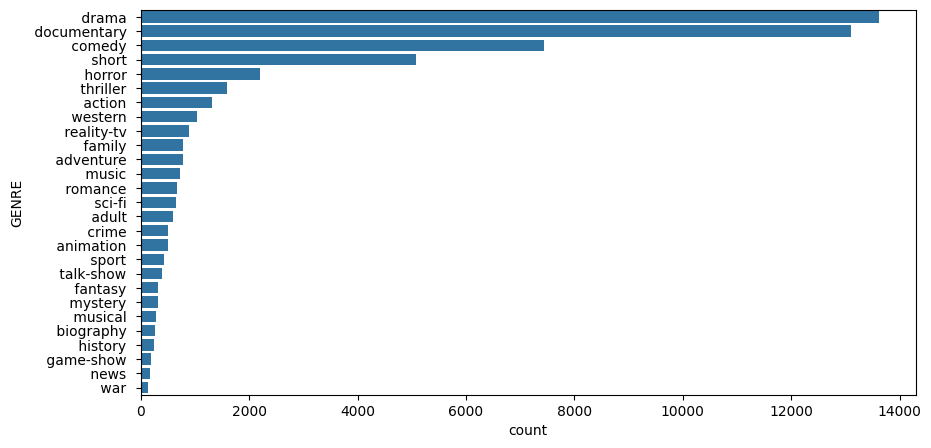

In [4]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_data, y="GENRE", order= train_data["GENRE"].value_counts().index)
plt.show()

## **Read Test Data & solution**

In [5]:
test_data= pd.read_csv("/content/test_data.txt", sep=":::", names=["TITLE","DESCRIPTION"],engine="python")
print(test_data.head())
test_data_sol=pd.read_csv("/content/test_data_solution.txt", sep=":::", names=["TITLE","GENRE","DESCRIPTION"],engine="python")
print(test_data_sol.head())

                           TITLE  \
1          Edgar's Lunch (1998)    
2      La guerra de papá (1977)    
3   Off the Beaten Track (2010)    
4        Meu Amigo Hindu (2015)    
5             Er nu zhai (1955)    

                                         DESCRIPTION  
1   L.R. Brane loves his life - his car, his apar...  
2   Spain, March 1964: Quico is a very naughty ch...  
3   One year in the life of Albin and his family ...  
4   His father has died, he hasn't spoken with hi...  
5   Before he was known internationally as a mart...  
                           TITLE          GENRE  \
1          Edgar's Lunch (1998)       thriller    
2      La guerra de papá (1977)         comedy    
3   Off the Beaten Track (2010)    documentary    
4        Meu Amigo Hindu (2015)          drama    
5             Er nu zhai (1955)          drama    

                                         DESCRIPTION  
1   L.R. Brane loves his life - his car, his apar...  
2   Spain, March 1964: Quico is a ve

## **Data Preprocessing**

In [6]:
stemmer = LancasterStemmer()#stemming-Reduce words to their root form
stop_words = set(stopwords.words("english"))  # Stopwords set like "the","and","of"

In [7]:
def preprocess_text(text):
    text = re.sub(r"[^\w\s]", "", text)  # Remove special characters
    text = text.lower()#Convert to lowercase
    text = re.sub(r"\s+", " ", text)#Remove extra whitespace
    text = re.sub(r'@\S+', '', text)#removes mentions from the text.
    text = re.sub(r'http\S+', '', text)#removes URLs from the text.
    text = re.sub(r'.pic\S+', '', text)#removes image links (often ending with .pic) from the text.
    text = re.sub(r'[^a-zA-Z+]', ' ', text)#replaces all non-alphanumeric characters (except +) with a space.
    words = nltk.word_tokenize(text)#tokenization-split the cleaned text into individual words or tokens
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])#remove stop words
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    text = "".join([i for i in text if i not in string.punctuation])#removes all punctuation from the text

    return text

In [8]:
train_data['TextCleaning'] = train_data['DESCRIPTION'].apply(preprocess_text)
test_data['TextCleaning'] = test_data['DESCRIPTION'].apply(preprocess_text)

In [9]:
train_data.head()

,TITLE,GENRE,DESCRIPTION,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents yearold ...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


## **TF-IDF to vectorize the data**

In [10]:
#use TF-IDF to convert the preprocessed text into numerical representations
vectorize = TfidfVectorizer()
X_train = vectorize.fit_transform(train_data["TextCleaning"])
X_test = vectorize.transform(test_data["TextCleaning"])

## **Spilt and Train a Model**

In [11]:
X=vectorize.fit_transform(train_data["TextCleaning"])
y=train_data["GENRE"]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.25, random_state=100)

## **Model Training**

In [12]:
mnb=MultinomialNB()
lgc=LogisticRegression()
svc=LinearSVC()

## **Logistic Regression**

In [26]:
lgc= LogisticRegression(max_iter=1000)
lgc.fit(X_train, Y_train)
lgc.score(X_test,Y_test)

0.5887560867640549

## **SVM**

In [14]:
svc.fit(X_train, Y_train)
svc.score(X_test,Y_test)

0.5924450346761104

## **Naive Bayes**

In [16]:
mnb.fit(X_train, Y_train)
mnb.score(X_test,Y_test)

0.44621513944223107

## **Predicting and Evaluating model performance**

In [17]:
ypred_test_lgc=lgc.predict(X_test)
ypred_train_lgc=lgc.predict(X_train)
print("Logistic Regression:--")
print("Train accuracy:", accuracy_score(Y_train, ypred_train_lgc))
print("Test accuracy:", accuracy_score(Y_test, ypred_test_lgc))
# print("Train classification report:")
# print(classification_report(Y_train, ypred_train_lgc,zero_division=0))

ypred_test_mnb=mnb.predict(X_test)
ypred_train_mnb=mnb.predict(X_train)
print("\nNAive Bayes:--")
print("Train accuracy:", accuracy_score(Y_train, ypred_train_mnb))
print("Test accuracy:", accuracy_score(Y_test, ypred_test_mnb))
# print("Test classification report:")
# print(classification_report(Y_test, ypred_test_mnb,zero_division=0))

ypred_test_svc=svc.predict(X_test)
ypred_train_svc=svc.predict(X_train)
print("\nSupport Vector Machine:--")
print("Train accuracy:", accuracy_score(Y_train, ypred_train_svc))
print("Test accuracy:", accuracy_score(Y_test, ypred_test_svc))

Logistic Regression:--
Train accuracy: 0.7026315789473684
Test accuracy: 0.5852884757267227

NAive Bayes:--
Train accuracy: 0.4668470241023119
Test accuracy: 0.44621513944223107

Support Vector Machine:--
Train accuracy: 0.9869158878504672
Test accuracy: 0.5924450346761104
